In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
#Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

# Quais as dimensões do dataframe?

In [6]:
df.shape

(29170, 9)

# Qual o tipo das variáveis?

In [7]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

# Existem variáveis faltantes no dataset? Quais?

In [8]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False)

nome      29170
dívida    29170
idade        99
dtype: int64

# Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [9]:
df.estado_civil.value_counts()

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [10]:
df.cor.value_counts()

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

In [11]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

# Faça um tratamento nas variáveis faltantes.

In [12]:
#Apaguei as colunas['nome', 'dívida'] 
df.drop(['nome', 'dívida'], axis=1, inplace=True)

In [13]:
#Preenchi a coluna idade com a media
media = df.idade.mean()
df.idade.fillna(media, inplace=True)

In [14]:
df.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

# Aplique uma transformação "MinMax" na variável 'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.



In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [16]:
X = df.tempo_educacao.values.reshape(-1,1)
X

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [17]:
mm_scaler.fit(X)

MinMaxScaler()

In [18]:
mm_scaler.transform(X)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [19]:
tempo_edu = pd.DataFrame(np.c_[mm_scaler.transform(X)].round(4))
tempo_edu.describe()

,0
count,29170.000000
mean,0.611287
std,0.159672
min,0.000000
25%,0.533300
50%,0.600000
75%,0.733300
max,1.000000


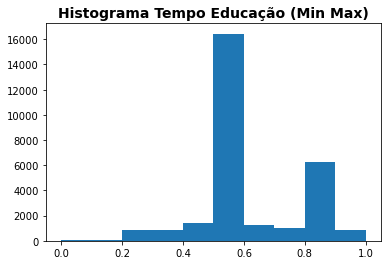

In [20]:
plt.title("Histograma Tempo Educação (Min Max)", fontsize = 14, fontweight = 'bold')
plt.hist(tempo_edu)
plt.show()

Informações Tempo Educação (Sem normalização):

count    29170.000000
mean        10.169455
std          2.394966
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: tempo_educacao, dtype: float64


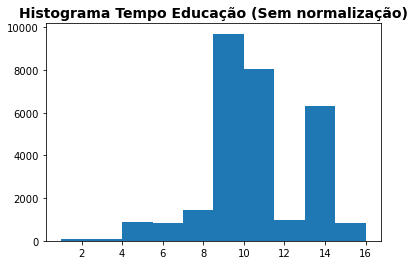

In [21]:
print("Informações Tempo Educação (Sem normalização):\n")
print(df.tempo_educacao.describe())

plt.title("Histograma Tempo Educação (Sem normalização)", fontsize = 14, fontweight = 'bold')
plt.hist(df.tempo_educacao)
plt.show()

In [22]:
X = df.horas_por_semana.values.reshape(-1,1)
X

array([[40],
       [13],
       [40],
       ...,
       [40],
       [20],
       [40]], dtype=int64)

In [23]:
ss_scaler.fit(X)

StandardScaler()

In [24]:
ss_scaler.transform(X)

array([[-0.03605983],
       [-2.21049975],
       [-0.03605983],
       ...,
       [-0.03605983],
       [-1.64675606],
       [-0.03605983]])

In [25]:
Horas_semana =  pd.DataFrame(np.c_[ss_scaler.transform(X)].round(4))
Horas_semana.describe()

,0
count,29170.000000
mean,-0.000018
std,1.000018
min,-3.176900
25%,-0.036100
50%,-0.036100
75%,0.366600
max,4.715500


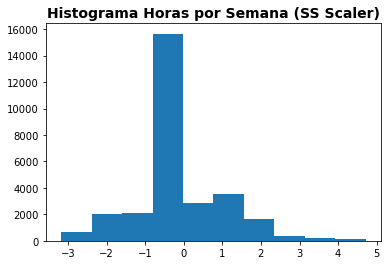

In [26]:
plt.title("Histograma Horas por Semana (SS Scaler)", fontsize = 14, fontweight = 'bold')
plt.hist(Horas_semana)
plt.show()

Informações Horas por Semana (Sem normalização):

count    29170.000000
mean        40.447755
std         12.417203
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: horas_por_semana, dtype: float64


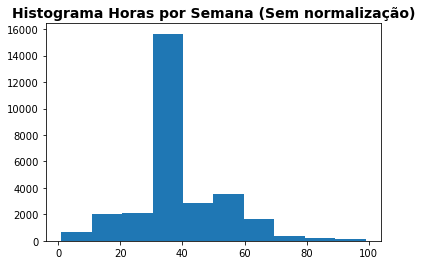

In [27]:
print("Informações Horas por Semana (Sem normalização):\n")
print(df.horas_por_semana.describe())

plt.title("Histograma Horas por Semana (Sem normalização)", fontsize = 14, fontweight = 'bold')
plt.hist(df.horas_por_semana)
plt.show()

# Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [28]:
print('estado civil')
print(df.estado_civil.value_counts())
print('___________________')
print('cor')
print(df.cor.value_counts())
print('___________________')
print('sexo')
print(df.sexo.value_counts())
print('___________________')

estado civil
Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64
___________________
cor
White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64
___________________
sexo
Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64
___________________


In [29]:
ohe = OneHotEncoder()

estado_civil = df.estado_civil.values.reshape(-1,1)

ohe.fit(estado_civil)

OneHotEncoder()

In [30]:
ohe.transform(estado_civil)

<29170x7 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [31]:
ohe.transform(estado_civil).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [32]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [33]:
df_est_civil= pd.DataFrame(ohe.transform(estado_civil).toarray(), 
                             columns = ohe.categories_[0].tolist())

In [34]:
cor = df.cor.values.reshape(-1,1)

ohe.fit(cor)

OneHotEncoder()

In [35]:
ohe.transform(cor)

<29170x5 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [36]:
ohe.transform(cor).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [37]:
ohe.categories_

[array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

In [38]:
df_cor= pd.DataFrame(ohe.transform(cor).toarray(), 
                             columns = ohe.categories_[0].tolist())

In [39]:
ohe = OneHotEncoder()

sexo = df.sexo.values.reshape(-1,1)

ohe.fit(sexo)

OneHotEncoder()

In [40]:
ohe.transform(sexo)

<29170x3 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [41]:
ohe.transform(sexo).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [42]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [43]:
ohe.categories_

[array(['?', 'Female', 'Male'], dtype=object)]

In [44]:
df_sexo= pd.DataFrame(ohe.transform(sexo).toarray(), 
                             columns = ohe.categories_[0].tolist())

df_sexo

,?,Female,Male
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
29165,0.0,1.0,0.0
29166,0.0,0.0,1.0
29167,0.0,1.0,0.0
29168,0.0,0.0,1.0


In [45]:
df_novo = pd.concat([df, df_est_civil, df_sexo, df_cor,Horas_semana,tempo_edu], axis = 1)
df_novo.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667


In [46]:
df_novo.drop(['estado_civil', 'cor','sexo', 'tempo_educacao', 'horas_por_semana' ], axis=1, inplace=True)
df_novo.head()

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667


In [47]:
df_novo.columns

Index([                'idade',         'salario_anual',
                    'Divorced',     'Married-AF-spouse',
          'Married-civ-spouse', 'Married-spouse-absent',
               'Never-married',             'Separated',
                     'Widowed',                     '?',
                      'Female',                  'Male',
          'Amer-Indian-Eskimo',    'Asian-Pac-Islander',
                       'Black',                 'Other',
                       'White',                       0,
                             0],
      dtype='object')

<AxesSubplot:>

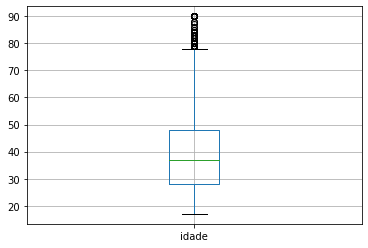

In [48]:
df_novo.boxplot('idade')

# Detecte e elimine os outliers da variável 'idade'.


In [49]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [50]:
df_novo['outlier_idade'] = detecta_outlier(df_novo.idade)

In [51]:
df_novo

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0,outlier_idade
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000,0
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000,0
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000,0
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.1971,0.7333,0
29166,40.0,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
29167,58.0,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
29168,22.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.6468,0.5333,0


In [52]:
df_novo.loc[(df_novo.outlier_idade == 0)]

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0,outlier_idade
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000,0
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000,0
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000,0
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.1971,0.7333,0
29166,40.0,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
29167,58.0,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
29168,22.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.6468,0.5333,0


# Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.


In [53]:
df_novo.head()

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0,outlier_idade
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000,0
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000,0
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000,0
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667,0


In [54]:
df_novo.head()

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0,outlier_idade
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000,0
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000,0
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000,0
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667,0


In [55]:
from pandas import Series
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [122]:
#Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


In [123]:
class Funcao:

    def preprocessamento(df, cols_numericas, cols_categoricas, cols_mm, cols_sc, cols_ohe, cols_ohe1, cols_ohe2,cols_outlier):

        from pandas import Series
        from sklearn.preprocessing import OneHotEncoder
        from sklearn.preprocessing import MinMaxScaler, StandardScaler

        dff = df.copy()
        df1 = df.copy()
        df2 = df.copy()
        df3 = df.copy()

        temp = (dff.isnull().sum() / dff.shape[0]) >= 0.8
        variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
        for v in variaveis_80percFaltantes:
            dff = dff.drop(v, axis = 1)

        cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
        cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))

        for v in cols_numericas:
            dff[v] = dff[v].fillna(dff[v].mean())

        for v in cols_categoricas:
            mode_v = dff[v].value_counts().idxmax()
            dff[v] = dff[v].fillna(mode_v)

        #OneHotEncoder

        OHE = OneHotEncoder()

        for x in cols_ohe: 
            X = df1[x].values.reshape(-1,1)
            df1[x] = OHE.fit(X)
            df1_ = pd.DataFrame(OHE.transform(X).toarray(), columns = OHE.categories_[0].tolist()) 
            dff = dff.drop(x, axis=1)


        for x in cols_ohe1:
            X = df2[x].values.reshape(-1,1)
            df2[x] = OHE.fit(X)
            df2_ = pd.DataFrame(OHE.transform(X).toarray(), columns = OHE.categories_[0].tolist()) 
            dff = dff.drop(x, axis=1)


        for x in cols_ohe2:
            X = df3[x].values.reshape(-1,1)
            df3[x] = OHE.fit(X)
            df3_ = pd.DataFrame(OHE.transform(X).toarray(), columns = OHE.categories_[0].tolist())
            dff = dff.drop(x, axis=1)
            
        # Normalização
        
        mm = MinMaxScaler()
        sc = StandardScaler()
        
        for x in cols_mm:
            X = dff[x].values.reshape(-1,1)
            df_mm = mm.fit(X)
            df_mm_ = pd.DataFrame(np.c_[mm.transform(X)].round(2))
            dff = dff.drop(x, axis=1)
            
        for x in cols_sc:
            X = dff[x].values.reshape(-1,1)
            df_sc = sc.fit(X)
            df_sc_ = pd.DataFrame(np.c_[sc.transform(X)].round(2))
            dff = dff.drop(x, axis=1)
                
        #Outlier

        def detecta_outlier(x, limite = 1.5):
            iqr = np.percentile(x, 75) - np.percentile(x, 25)
            limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
            limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
            return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

        for i in cols_outlier:
            col_out = detecta_outlier(dff[i])
            col_out = col_out[col_out==0]
            df_outlier = pd.DataFrame(col_out)

        df_novo = pd.concat([dff, df_mm_, df_sc_, df1_, df2_, df3_, df_outlier], axis = 1)    
        
        return df_novo

In [124]:
df_limpo = Funcao.preprocessamento(df = df, 
                            cols_numericas = ['idade', 'tempo_educacao', 'horas_por_semana'],
                            cols_categoricas = ['estado_civil', 'cor', 'sexo'],
                            cols_mm = ['tempo_educacao'],
                            cols_sc = ['horas_por_semana'],
                            cols_ohe = ['estado_civil'],
                            cols_ohe1 = ['cor'],
                            cols_ohe2 = ['sexo'],
                            cols_outlier = ['idade']
                           )

df_limpo.head()

,idade,salario_anual,0,0,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Female,Male,0
0,39.0,<=50K,0.80,-0.04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50.0,<=50K,0.80,-2.21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38.0,<=50K,0.53,-0.04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53.0,<=50K,0.40,-0.04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37.0,<=50K,0.87,-0.04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [95]:
df_novo.head()

,idade,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,0,outlier_idade
0,39.0,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8000,0
1,50.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-2.2105,0.8000,0
2,38.0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.5333,0
3,53.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.0361,0.4000,0
4,37.0,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0361,0.8667,0


In [97]:
df_novo.shape

(29170, 20)

In [125]:
df_limpo.shape

(29170, 20)